In [40]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [41]:
num_qubits=2
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [42]:
# t=np.linspace(-10,-1, 20)
t=np.linspace(0.000,2, 50)
print(t)

[0.         0.04081633 0.08163265 0.12244898 0.16326531 0.20408163
 0.24489796 0.28571429 0.32653061 0.36734694 0.40816327 0.44897959
 0.48979592 0.53061224 0.57142857 0.6122449  0.65306122 0.69387755
 0.73469388 0.7755102  0.81632653 0.85714286 0.89795918 0.93877551
 0.97959184 1.02040816 1.06122449 1.10204082 1.14285714 1.18367347
 1.2244898  1.26530612 1.30612245 1.34693878 1.3877551  1.42857143
 1.46938776 1.51020408 1.55102041 1.59183673 1.63265306 1.67346939
 1.71428571 1.75510204 1.79591837 1.83673469 1.87755102 1.91836735
 1.95918367 2.        ]


In [43]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits-1)])

    qml.RY(wires=0,phi=theta[0])
    qml.RX(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [44]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [45]:

def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [46]:
# f(-1.7)

In [47]:
# def f_test(t):
#     return 4*t**3+5*t**2+20*t-10
# def f_test(t):
    
#     del1_target_values=[0.0626, 0.0654128694896339, 0.06861048523231798, 0.0717696944764635, 0.07489043267534999, 0.0779728455818338, 0.08101709510535939, 0.0840233583219672, 0.08699182518697031, 0.0899226984400258, 0.09281619393995905, 0.0956725387836735, 0.09849197111545026, 0.10127473823249328, 0.1040210965849295, 0.10673131190967008, 0.10940565830077785, 0.11204441683700853, 0.11464787645572065, 0.1172163314549275, 0.11975008149329716, 0.12224943159015245, 0.12471469212547098, 0.12714617917589405, 0.1295442104104402, 0.1319091089596631, 0.13424120074224347, 0.1365408137193849, 0.13880827789481415, 0.14104392531478085, 0.14324809006805758, 0.14542110828593993, 0.147563318635035, 0.14967505736980216, 0.15175666371535795, 0.1538084770704075, 0.1558308363717687, 0.15782408009437224, 0.1597885462512616, 0.16172457239359303, 0.16363249561063564, 0.16551265252977135, 0.16736537945894997, 0.169191012259936, 0.17098988223003628, 0.17276232171218334, 0.17450866100523516, 0.17622922836397534, 0.17792434999911297, 0.17959435007728264]
#     omega1_target_values=[1.0, 1.0002089794260889, 1.0002065644242002, 1.0002040599936957, 1.0002015643339355, 1.000199078777491, 1.0001966042806651, 1.0001941415955593, 1.0001916916096918, 1.0001892553678093, 1.0001868336161226, 1.0001844269222777, 1.0001820359331468, 1.000179661292938, 1.0001773036431931, 1.0001749636253419, 1.0001726417132004, 1.0001703382616356, 1.0001680537049182, 1.0001657884482131, 1.000163542867578, 1.0001613173099644, 1.0001591120932178, 1.0001569275711912, 1.0001547638508346, 1.0001526211327025, 1.000150499639947, 1.0001483995613456, 1.0001463210513042, 1.0001442642298546, 1.0001422291826556, 1.0001402159609931, 1.0001382247773762, 1.0001362555336364, 1.000134308244816, 1.00013238296878, 1.0001304797359551, 1.000128598549329, 1.0001267393844504, 1.00012490218943, 1.0001230868849398, 1.0001212933642125, 1.000119521520392, 1.0001177715586809, 1.0001160430960392, 1.0001143360832625, 1.0001126504529687, 1.0001109861195974, 1.0001093429794106, 1.000107720910492]
#     return del1_target_values


In [48]:
del1_target_values=[0.0626, 0.0654128694896339, 0.06861048523231798, 0.0717696944764635, 0.07489043267534999, 0.0779728455818338, 0.08101709510535939, 0.0840233583219672, 0.08699182518697031, 0.0899226984400258, 0.09281619393995905, 0.0956725387836735, 0.09849197111545026, 0.10127473823249328, 0.1040210965849295, 0.10673131190967008, 0.10940565830077785, 0.11204441683700853, 0.11464787645572065, 0.1172163314549275, 0.11975008149329716, 0.12224943159015245, 0.12471469212547098, 0.12714617917589405, 0.1295442104104402, 0.1319091089596631, 0.13424120074224347, 0.1365408137193849, 0.13880827789481415, 0.14104392531478085, 0.14324809006805758, 0.14542110828593993, 0.147563318635035, 0.14967505736980216, 0.15175666371535795, 0.1538084770704075, 0.1558308363717687, 0.15782408009437224, 0.1597885462512616, 0.16172457239359303, 0.16363249561063564, 0.16551265252977135, 0.16736537945894997, 0.169191012259936, 0.17098988223003628, 0.17276232171218334, 0.17450866100523516, 0.17622922836397534, 0.17792434999911297, 0.17959435007728264]
omega1_target_values=[1.0, 1.0002089794260889, 1.0002065644242002, 1.0002040599936957, 1.0002015643339355, 1.000199078777491, 1.0001966042806651, 1.0001941415955593, 1.0001916916096918, 1.0001892553678093, 1.0001868336161226, 1.0001844269222777, 1.0001820359331468, 1.000179661292938, 1.0001773036431931, 1.0001749636253419, 1.0001726417132004, 1.0001703382616356, 1.0001680537049182, 1.0001657884482131, 1.000163542867578, 1.0001613173099644, 1.0001591120932178, 1.0001569275711912, 1.0001547638508346, 1.0001526211327025, 1.000150499639947, 1.0001483995613456, 1.0001463210513042, 1.0001442642298546, 1.0001422291826556, 1.0001402159609931, 1.0001382247773762, 1.0001362555336364, 1.000134308244816, 1.00013238296878, 1.0001304797359551, 1.000128598549329, 1.0001267393844504, 1.00012490218943, 1.0001230868849398, 1.0001212933642125, 1.000119521520392, 1.0001177715586809, 1.0001160430960392, 1.0001143360832625, 1.0001126504529687, 1.0001109861195974, 1.0001093429794106, 1.000107720910492]


In [49]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:2], params[2:]
    theta = theta_flat.reshape(theta_shape)
    loss = 0
    for i in range(len(t)):
        loss += (f(t[i],theta,w)-del1_target_values[i])**2
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [50]:
import numpy as np
from scipy.optimize import minimize



theta = np.random.uniform(0, 2 * np.pi, size=(4))
w = np.zeros(2)

initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:2], result.x[2:]
theta = theta_flat.reshape(theta.shape)

Current loss: 0.07666116634760065
Current loss: 0.0014649534125229897
Current loss: 0.0013995035063270704
Current loss: 0.0012750511129875747
Current loss: 0.0010553444485025102
Current loss: 0.0009317985790363217
Current loss: 0.0007373884879741412
Current loss: 0.00043804702362779466
Current loss: 0.0002574776019555043
Current loss: 0.0001919996575777302
Current loss: 0.00015519109816546328
Current loss: 9.312216184447162e-05
Current loss: 1.5757174753840733e-05
Current loss: 2.273755603157901e-06


In [51]:
print(w)

[-0.04057123  0.05307013]


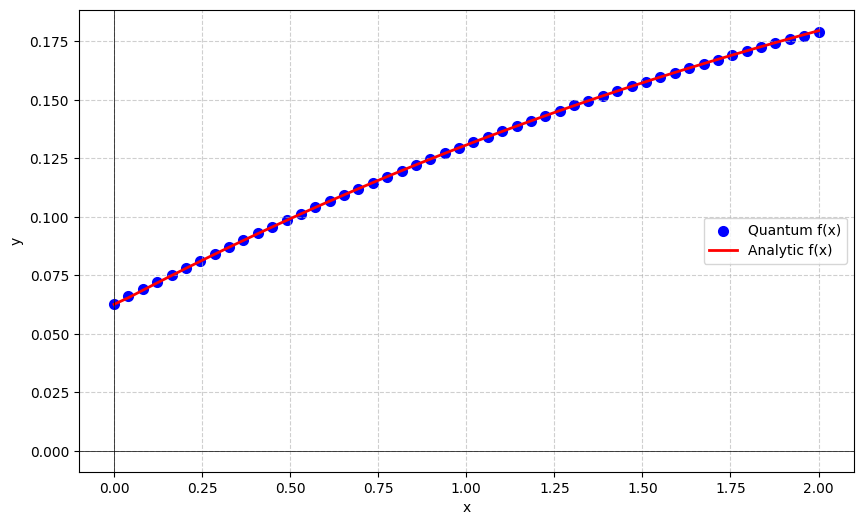

In [52]:

# Calculate corresponding y values for both functions
y1 = [f(x,theta,w) for x in t]
# y2 = [f_test(x) for x in t]
y2 = [del1_target_values[i] for i in range(len(t))]


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(t, y1, label='Quantum f(x)', linewidth=2, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=2, color='r')  # Plot the second function
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
# plt.title('Plot of Two Functions')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
# plt.ylim([-5, 10])  # Set y-axis limits
